In [88]:
### Import necessary modules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

In [89]:

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

In [90]:
df = vv.dataset_modelling_version(iteration_code="0051_20220716", row_limit=0)
print(df.shape)
df.sample(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:402: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 23532/48705/43463/43993/16764 ==> 23532/39167/38958/38964/16764
type <class 'pandas.core.indexes.base.Index'>
(21382, 15)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType
ids,,,,,,,,,,,,,,,
84705285,315000.0,51.389705,-0.298026,0.3,1.0,1.0,7.0,20220419.0,4.0,27.0,Kingston upon Thames,Flats / Apartments,Apartment,KT,LEASEHOLD
112244162,380000.0,51.53402,-0.007740,0.2,1.0,1.0,12.0,20210820.0,4.0,NaN,Newham,Flats / Apartments,Apartment,E,LEASEHOLD
85680768,399950.0,51.393093,-0.294469,0.4,2.0,1.0,11.0,20220614.0,4.0,37.0,Kingston upon Thames,Flats / Apartments,Flat,KT,LEASEHOLD
84070734,475000.0,51.40699,-0.090910,0.7,3.0,1.0,16.0,20220223.0,4.0,37.0,Croydon,Houses,Terraced,CR,FREEHOLD
124191302,599950.0,51.430711,-0.326043,0.5,2.0,1.0,6.0,20220622.0,4.0,NaN,Richmond upon Thames,Flats / Apartments,Flat,TW,LEASEHOLD
124114214,350000.0,51.42655,-0.131706,0.0,1.0,1.0,8.0,20220620.0,4.0,NaN,Lambeth,Flats / Apartments,Flat,SW,LEASEHOLD
124450322,400000.0,51.44882,-0.005830,0.3,2.0,1.0,15.0,20220629.0,4.0,NaN,Lewisham,Flats / Apartments,Flat,SE,LEASEHOLD
85389150,500000.0,51.38168,-0.240207,0.2,2.0,1.0,10.0,20220531.0,4.0,37.0,Sutton,Houses,Terraced,KT,FREEHOLD
120853796,425000.0,51.563571,0.270409,0.9,2.0,1.0,10.0,20220309.0,4.0,37.0,Havering,Houses,Semi-Detached,RM,FREEHOLD


In [91]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=['property_age'],
                     na_drop_rows=['analyticsProperty.imageCount', 'analyticsProperty.added'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21382 entries, 124483172 to 114438299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           21382 non-null  float64
 1   location.latitude               21380 non-null  float64
 2   location.longitude              21382 non-null  float64
 3   distance_to_any_train           21382 non-null  float64
 4   bedrooms_model                  21382 non-null  float64
 5   bathrooms_model                 21382 non-null  float64
 6   analyticsProperty.imageCount    21373 non-null  float64
 7   analyticsProperty.added         21373 non-null  float64
 8   floorplan_count                 21382 non-null  float64
 9   borough_name                    21382 non-null  object 
 10  analyticsProperty.propertyType  21373 non-null  object 
 11  propertySubType                 21380 non-null  object 
 12  coarse_compass_direction 

In [93]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name,analyticsProperty.propertyType,propertySubType,coarse_compass_direction,tenure.tenureType
ids,,,,,,,,,,,,,,
106171337,500000.0,51.596492,-0.398523,0.5,2.0,2.0,17.0,20210429.0,4.0,Hillingdon,Houses,End of Terrace,HA,NaN
122407154,509950.0,51.527327,-0.448254,1.6,3.0,2.0,8.0,20220414.0,1.0,Hillingdon,Houses,Semi-Detached,UB,NaN
110728736,525000.0,51.549648,-0.443655,0.4,4.0,2.0,12.0,20210721.0,4.0,Hillingdon,Houses,Terraced,UB,NaN
124028090,525000.0,51.521370,-0.396900,1.3,3.0,2.0,14.0,20220617.0,4.0,Hillingdon,Houses,Terraced,UB,NaN
121469105,525000.0,51.568015,-0.416145,0.3,2.0,1.0,10.0,20220323.0,4.0,Hillingdon,Bungalows,Bungalow,HA,NaN
121349840,525000.0,51.529819,-0.454592,1.5,2.0,1.0,8.0,20220321.0,4.0,Hillingdon,Bungalows,Detached Bungalow,UB,NaN
119699453,525000.0,51.521095,-0.403470,1.5,3.0,1.0,10.0,20220208.0,4.0,Hillingdon,Houses,Semi-Detached,UB,NaN
123402008,525000.0,51.562204,-0.450586,0.4,2.0,1.0,10.0,20220516.0,4.0,Hillingdon,Houses,Terraced,UB,NaN
120485357,525000.0,51.615761,-0.417376,0.4,2.0,2.0,10.0,20220228.0,4.0,Hillingdon,Flats / Apartments,Apartment,HA,NaN


In [94]:
df.dropna(inplace=True)

In [95]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [96]:
if False:
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.base import BaseEstimator, TransformerMixin

    # column index
    rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


    class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
            self.add_bedrooms_per_room = add_bedrooms_per_room

        def fit(self, X, y=None):
            return self  # nothing else to do

        def transform(self, X):

            return X

            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
                return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
            else:
                return np.c_[X, rooms_per_household, population_per_household]


    # num_pipeline = Pipeline([
    #     ('imputer', SimpleImputer(strategy='median')),
    #     ('attribs_adder', CombinedAttributesAdder())
    #     ('std_scaler', StandardScaler())
    # ])

    num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

    df = num_pipeline.fit_transform(df)
else:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.compose import ColumnTransformer

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])  # define the transformer for categorical columns

    numeric_no_scale_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
    ])  # define the transformer for categorical columns

    categorical_transformer1 = Pipeline(steps=[
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    categorical_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
    features_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_transformer, ['location.latitude', 'location.longitude','distance_to_any_train','bedrooms_model','bathrooms_model','analyticsProperty.imageCount','analyticsProperty.added','floorplan_count']),
            ('categorical1', categorical_transformer1, ['borough_name','analyticsProperty.propertyType','propertySubType','coarse_compass_direction','tenure.tenureType']),
            ('categorical2', categorical_transformer2, [])
        ])
    features_noscale_preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_no_scale_transformer, ['location.latitude', 'location.longitude','distance_to_any_train','bedrooms_model','bathrooms_model','analyticsProperty.imageCount','analyticsProperty.added','floorplan_count']),
            ('categorical1', categorical_transformer1, ['borough_name','analyticsProperty.propertyType','propertySubType','coarse_compass_direction','tenure.tenureType']),
            ('categorical2', categorical_transformer2, [])
        ])
features_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [99]:
features_noscale_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['borough_name',
                                  'analyticsProperty.propertyType',
                                  'propertySubType', 'coarse_compass_direction',
                                  'tenure.tenureType']),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

Now working on LinR model...
   LinR cross-validating...
   LinR fitting...
   LinR predicting...
LinR
   LinR compare actual and predicted...
             actual  predicted  difference
ids                                       
85722438   125000.0   440736.0    315736.0
124300382  126250.0   440480.0    314230.0
124310366  125625.0   422496.0    296871.0
124207679  175500.0   460320.0    284820.0
118545173  195000.0   467168.0    272168.0
             actual  predicted  difference
ids                                       
123843821  300000.0   299360.0       640.0
123050585  325000.0   325568.0       568.0
121408265  375000.0   375136.0       136.0
124195235  425000.0   425088.0        88.0
113519267  425000.0   425056.0        56.0
   LinR graphing...


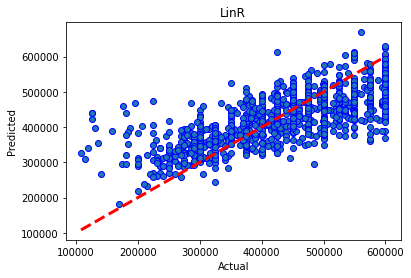

Now working on LinR Dupl model...
   LinR Dupl cross-validating...
   LinR Dupl fitting...
   LinR Dupl predicting...
LinR Dupl
   LinR Dupl compare actual and predicted...
             actual  predicted  difference
ids                                       
85722438   125000.0   440736.0    315736.0
124300382  126250.0   440480.0    314230.0
124310366  125625.0   422496.0    296871.0
124207679  175500.0   460320.0    284820.0
118545173  195000.0   467168.0    272168.0
             actual  predicted  difference
ids                                       
123843821  300000.0   299360.0       640.0
123050585  325000.0   325568.0       568.0
121408265  375000.0   375136.0       136.0
124195235  425000.0   425088.0        88.0
113519267  425000.0   425056.0        56.0
   LinR Dupl graphing...


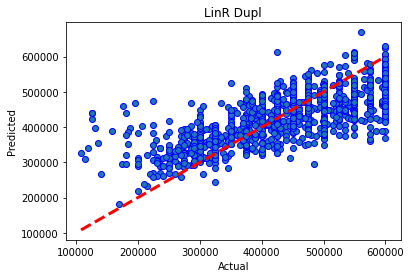

Now working on LinR noscale model...
   LinR noscale cross-validating...
   LinR noscale fitting...
   LinR noscale predicting...
LinR noscale
   LinR noscale compare actual and predicted...
             actual      predicted     difference
ids                                              
85722438   125000.0  440761.452719  315761.452719
124300382  126250.0  439330.740686  313080.740686
124310366  125625.0  422212.160499  296587.160499
124207679  175500.0  460293.103916  284793.103916
118545173  195000.0  467207.781587  272207.781587
             actual      predicted  difference
ids                                           
123264149  405000.0  404573.561456  426.438544
121262315  350000.0  349654.169881  345.830119
121408265  375000.0  375181.976257  181.976257
113519267  425000.0  424886.635090  113.364910
123050585  325000.0  324899.390671  100.609329
   LinR noscale graphing...


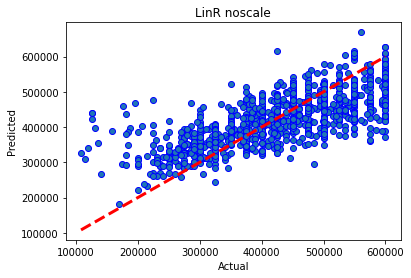

Now working on KNN model...
   KNN cross-validating...
   KNN fitting...
   KNN predicting...
KNN
   KNN compare actual and predicted...
             actual  predicted  difference
ids                                       
118545173  195000.0   517000.0    322000.0
124207679  175500.0   475000.0    299500.0
117691445  600000.0   310600.0    289400.0
124300382  126250.0   412250.0    286000.0
85722438   125000.0   404000.0    279000.0
             actual  predicted  difference
ids                                       
124494386  525000.0   525000.0         0.0
122209139  350000.0   350000.0         0.0
124362518  425000.0   425000.0         0.0
120385565  600000.0   600000.0         0.0
122693972  350000.0   350000.0         0.0
   KNN graphing...


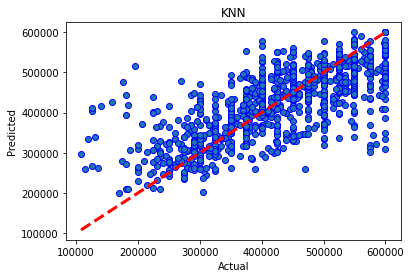

Now working on KNN noscale model...
   KNN noscale cross-validating...
   KNN noscale fitting...
   KNN noscale predicting...
KNN noscale
   KNN noscale compare actual and predicted...
             actual  predicted  difference
ids                                       
119181125  600000.0   275000.0    325000.0
122580755  599950.0   284990.0    314960.0
124563332  575000.0   285590.0    289410.0
85505526   120000.0   409000.0    289000.0
85722438   125000.0   411000.0    286000.0
             actual  predicted  difference
ids                                       
120076490  450000.0   450000.0         0.0
124300544  340000.0   340000.0         0.0
121044125  330000.0   330000.0         0.0
123737606  380000.0   380000.0         0.0
84032397   525000.0   525000.0         0.0
   KNN noscale graphing...


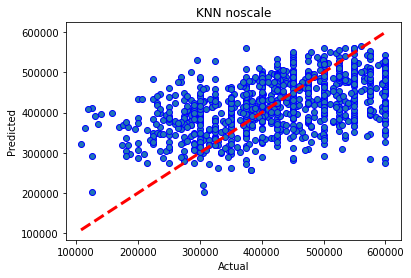

Now working on GNB model...
   GNB cross-validating...
   GNB fitting...
   GNB predicting...
GNB
   GNB compare actual and predicted...
             actual  predicted  difference
ids                                       
120529178  600000.0   105000.0    495000.0
121062908  600000.0   105000.0    495000.0
117691445  600000.0   107500.0    492500.0
119075147  595000.0   112500.0    482500.0
124660112  575000.0   107500.0    467500.0
             actual  predicted  difference
ids                                       
122381537  600000.0   600000.0         0.0
122672870  600000.0   600000.0         0.0
123597014  490000.0   490000.0         0.0
85430478   600000.0   600000.0         0.0
124104500  600000.0   600000.0         0.0
   GNB graphing...


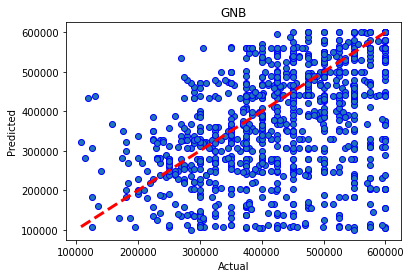

Now working on GNB noscale model...
   GNB noscale cross-validating...
   GNB noscale fitting...
   GNB noscale predicting...
GNB noscale
   GNB noscale compare actual and predicted...
             actual  predicted  difference
ids                                       
121062908  600000.0   105000.0    495000.0
120529178  600000.0   105000.0    495000.0
117691445  600000.0   107500.0    492500.0
119075147  595000.0   112500.0    482500.0
96643793   575000.0   124000.0    451000.0
             actual  predicted  difference
ids                                       
118865366  600000.0   600000.0         0.0
120385565  600000.0   600000.0         0.0
122672870  600000.0   600000.0         0.0
108201851  600000.0   600000.0         0.0
118058441  475000.0   475000.0         0.0
   GNB noscale graphing...


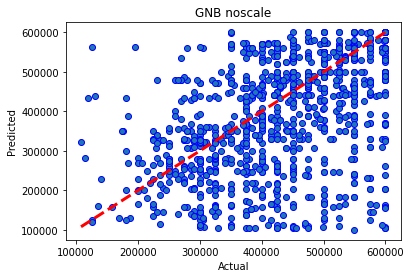

Now working on NEW - Ridge LR model...
   NEW - Ridge LR cross-validating...
   NEW - Ridge LR fitting...
   NEW - Ridge LR predicting...
NEW - Ridge LR
   NEW - Ridge LR compare actual and predicted...
             actual      predicted     difference
ids                                              
85722438   125000.0  440679.626933  315679.626933
124300382  126250.0  439090.675381  312840.675381
124310366  125625.0  422199.828922  296574.828922
124207679  175500.0  460413.310040  284913.310040
118545173  195000.0  467185.615183  272185.615183
             actual      predicted  difference
ids                                           
121690340  395000.0  394581.851510  418.148490
121262315  350000.0  349774.217009  225.782991
123050585  325000.0  324818.431889  181.568111
121408265  375000.0  375058.908784   58.908784
113519267  425000.0  425035.267842   35.267842
   NEW - Ridge LR graphing...


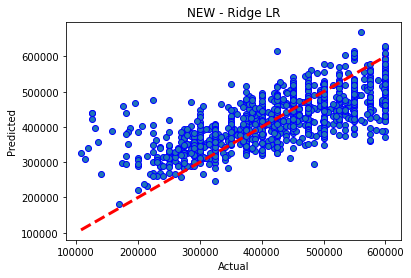

Now working on NEW - Ridge LR noscale model...
   NEW - Ridge LR noscale cross-validating...
   NEW - Ridge LR noscale fitting...
   NEW - Ridge LR noscale predicting...
NEW - Ridge LR noscale
   NEW - Ridge LR noscale compare actual and predicted...
             actual      predicted     difference
ids                                              
85722438   125000.0  441034.907765  316034.907765
124300382  126250.0  439199.462421  312949.462421
124310366  125625.0  422120.503855  296495.503855
124207679  175500.0  460342.266597  284842.266597
118545173  195000.0  467551.057645  272551.057645
             actual      predicted  difference
ids                                           
123805763  415000.0  415647.916187  647.916187
123050585  325000.0  325506.756605  506.756605
121408265  375000.0  375393.577438  393.577438
121262315  350000.0  349950.716272   49.283728
121690340  395000.0  395025.880869   25.880869
   NEW - Ridge LR noscale graphing...


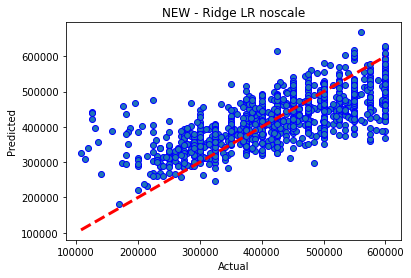

Now working on RF model...
   RF cross-validating...
   RF fitting...
   RF predicting...
RF
   RF compare actual and predicted...
             actual      predicted     difference
ids                                              
113518799  157500.0  522862.500000  365362.500000
117691445  600000.0  280837.500000  319162.500000
124207679  175500.0  476749.960000  301249.960000
85680288   580000.0  286760.783333  293239.216667
122408216  470000.0  185780.000000  284220.000000
             actual  predicted  difference
ids                                       
124291688  480000.0  480147.40      147.40
119858387  290000.0  289941.00       59.00
85486902   400000.0  399984.60       15.40
122381537  600000.0  599999.99        0.01
85462188   600000.0  600000.00        0.00
   RF graphing...


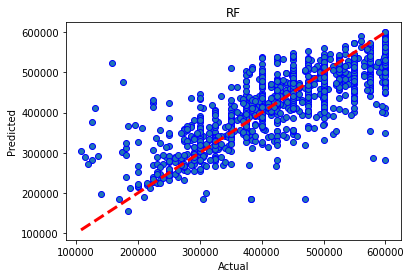

Now working on SVM model...
   SVM cross-validating...
   SVM fitting...
   SVM predicting...
SVM
   SVM compare actual and predicted...
             actual      predicted     difference
ids                                              
122353955  108000.0  425013.986896  317013.986896
123703928  114000.0  425047.039055  311047.039055
85505526   120000.0  424825.510999  304825.510999
85722438   125000.0  425291.124470  300291.124470
124310366  125625.0  425432.723177  299807.723177
             actual      predicted  difference
ids                                           
123506903  425000.0  424956.566476   43.433524
84069936   425000.0  424958.330218   41.669782
115764002  425000.0  425034.582476   34.582476
80404557   425000.0  425031.043223   31.043223
123934721  425000.0  424978.353877   21.646123
   SVM graphing...


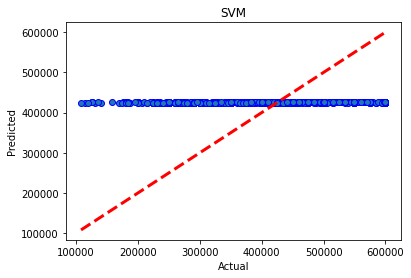

Now working on XGB model...
   XGB cross-validating...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621], got [100000. 100500. 102000. 103500. 105000. 106250. 106750. 107500. 108000.
 109250. 110000. 111000. 112000. 112500. 113750. 114000. 114375. 115000.
 115500. 115625. 117500. 118000. 118750. 120000. 120625. 121250. 122500.
 123750. 124000. 124375. 124995. 125000. 126250. 126875. 127000. 128750.
 129000. 130000. 130625. 131250. 131875. 132500. 133125. 134000. 134750.
 135000. 136250. 136875. 137000. 137500. 138000. 138250. 138750. 140000.
 140625. 141750. 141875. 142500. 144000. 145000. 145250. 146250. 146875.
 148000. 148750. 149500. 149995. 150000. 152000. 152250. 153000. 153750.
 154000. 154975. 156000. 156250. 157500. 159000. 159250. 159500. 160000.
 161000. 161250. 162000. 162500. 163000. 163125. 164000. 164375. 165000.
 166250. 166500. 167500. 168000. 169950. 169995. 170000. 171000. 171250.
 171500. 172500. 172975. 173250. 173750. 174000. 175000. 177500. 178000.
 179950. 180000. 180250. 182000. 183750. 184000. 184995. 185000. 187500.
 189950. 189995. 190000. 191250. 192500. 194999. 195000. 197500. 197750.
 198000. 199000. 199950. 199995. 199999. 200000. 201250. 201500. 202000.
 202500. 204000. 204950. 205000. 206250. 209000. 209950. 210000. 211500.
 212000. 212500. 214000. 214995. 215000. 216000. 217250. 218000. 218750.
 219000. 219950. 220000. 220500. 222000. 223000. 224000. 224978. 224995.
 225000. 229000. 229950. 229995. 229999. 230000. 231000. 232000. 234000.
 234995. 235000. 237500. 238000. 239000. 239500. 239950. 239995. 240000.
 242000. 242500. 243000. 244950. 245000. 247500. 248000. 249500. 249950.
 249995. 249999. 250000. 252000. 253000. 253750. 254950. 255000. 256000.
 257250. 258000. 259000. 259950. 259995. 260000. 262000. 262500. 263000.
 263250. 264000. 264500. 264950. 265000. 267000. 268000. 269000. 269500.
 269950. 269995. 269999. 270000. 274950. 275000. 277500. 278000. 279000.
 279950. 279995. 279999. 280000. 282000. 284950. 285000. 286000. 287500.
 289000. 289500. 289950. 289995. 289999. 290000. 292000. 292500. 294000.
 294950. 294995. 295000. 295200. 297000. 297500. 299000. 299500. 299950.
 299990. 299995. 299999. 300000. 305000. 307500. 308500. 309500. 309950.
 309995. 310000. 310995. 312000. 312500. 314950. 314990. 315000. 315950.
 316540. 317000. 318500. 318750. 319500. 319950. 319995. 319999. 320000.
 321500. 322500. 324950. 325000. 327000. 327500. 329000. 329950. 330000.
 332495. 332500. 333750. 334950. 334995. 335000. 337500. 338000. 339000.
 339950. 339995. 339999. 340000. 343000. 345000. 348000. 349000. 349950.
 349995. 349999. 350000. 352000. 353995. 354750. 354950. 355000. 358500.
 359000. 359950. 359995. 359999. 360000. 362500. 364950. 365000. 367000.
 367500. 369500. 369950. 369995. 370000. 372500. 373000. 374950. 375000.
 377300. 378000. 379000. 379950. 379995. 379999. 380000. 381000. 382000.
 384995. 385000. 385995. 386000. 386250. 387500. 388950. 389000. 389500.
 389950. 389995. 390000. 391875. 392000. 393000. 393750. 394500. 394950.
 395000. 395950. 397000. 397500. 398000. 398995. 399000. 399500. 399950.
 399995. 399999. 400000. 403195. 405000. 407250. 407995. 408000. 408750.
 409950. 409995. 410000. 410750. 411500. 412500. 414950. 415000. 418000.
 419000. 419667. 419950. 419999. 420000. 420790. 422000. 422500. 422790.
 424950. 424999. 425000. 425950. 426000. 427000. 427500. 428000. 429000.
 429195. 429950. 430000. 432249. 432500. 433000. 434950. 435000. 437500.
 438000. 438750. 439000. 439500. 439950. 440000. 441000. 442000. 442500.
 442995. 443700. 444995. 445000. 445950. 446263. 447500. 448000. 449000.
 449500. 449950. 449995. 449999. 450000. 450500. 451000. 455000. 455995.
 456000. 458500. 458650. 459000. 459500. 459950. 459995. 460000. 461000.
 461995. 464500. 464950. 464999. 465000. 465500. 469000. 469950. 469995.
 470000. 471000. 472500. 473000. 474000. 474950. 475000. 477000. 477500.
 478750. 479000. 479950. 479995. 480000. 481000. 482000. 482500. 483500.
 483750. 484000. 485000. 485500. 485995. 487500. 488000. 489000. 489500.
 489950. 489995. 489999. 490000. 490150. 492500. 493750. 495000. 495500.
 495995. 497000. 497500. 498950. 499000. 499500. 499799. 499950. 499995.
 499999. 500000. 502500. 504950. 505000. 505995. 506995. 509950. 509995.
 510000. 511500. 511875. 512500. 514950. 515000. 517000. 517500. 519950.
 519995. 520000. 524000. 524950. 524995. 524998. 524999. 525000. 528000.
 529000. 529950. 529995. 530000. 534000. 534950. 534995. 535000. 537500.
 538000. 538500. 538951. 539000. 539950. 539998. 540000. 541541. 542500.
 543000. 544000. 544950. 545000. 545500. 546250. 547500. 548000. 548450.
 549000. 549500. 549950. 549995. 549999. 550000. 552500. 555000. 557000.
 557500. 558000. 559000. 559950. 559995. 560000. 562000. 562500. 564950.
 564995. 565000. 567000. 567500. 568400. 569950. 569995. 569999. 570000.
 572500. 573000. 574950. 574995. 574999. 575000. 576115. 576580. 576800.
 577500. 579000. 579500. 579950. 579995. 580000. 582500. 583000. 584995.
 585000. 587500. 588000. 589000. 590000. 592000. 592250. 592500. 594950.
 595000. 595999. 597500. 597800. 599000. 599500. 599950. 599995. 599999.
 600000.]

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []

    models = [
        ('LinR', LinearRegression()),
        ('LinR Dupl', LinearRegression()),
        ('LinR noscale', LinearRegression()),
        ('KNN', KNeighborsRegressor()),
        ('KNN noscale', KNeighborsRegressor()),
        ('GNB', GaussianNB()),
        ('GNB noscale', GaussianNB()),
        ('NEW - Ridge LR', linear_model.Ridge(alpha=.5)),
        ('NEW - Ridge LR noscale', linear_model.Ridge(alpha=.5)),
        ('RF', RandomForestRegressor()),
        ('SVM', SVR()),
        ('XGB', XGBClassifier())
        #x('LogReg Cl', LogisticRegression()),
        #x('RF Cl', RandomForestClassifier()),
        #x('KNN Cl', KNeighborsClassifier()),
        #x('SVM Cl', SVC()),
    ]

    results = []
    names = []

    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']  #, 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance'
    # ,'d2_absolute_error_score','d2_pinball_score','d2_tweedie_score'
    target_names = ['malignant', 'benign']
    for name, model in models:
        print(f"Now working on {name} model...")
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        print(f"   {name} cross-validating...")
        if 'noscale' in name:
            pipe = Pipeline(steps=[
                ('preprocessor', features_noscale_preprocessor),  # preprocess features
                ('estimator', model),
            ])  # start the training
        else:
            pipe = Pipeline(steps=[
                ('preprocessor', features_preprocessor),
                ('estimator', model),  # preprocess features
            ])  # start the training
        pipe.fit(X_train, y_train)
        ###print(X_train.head(5))
        ###print(y_train.head(5))
        cv_results = model_selection.cross_validate(pipe, X_train, y_train, cv=kfold, scoring=scoring)

        print(f"   {name} fitting...")
        #clf = model.fit(X_train, y_train)

        print(f"   {name} predicting...")
        #y_pred = clf.predict(X_test)
        y_pred = pipe.predict(X_test)
        print(name)
        mae = metrics.mean_absolute_error(y_test, y_pred)  # NEW
        mse = metrics.mean_squared_error(y_test, y_pred)  # NEW
        r2 = metrics.r2_score(y_test, y_pred)  # NEW
        #print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        #this_df['model'] = name
        this_df.insert(loc=0, column='model', value=name)
        this_df.insert(loc=1, column='run', value=range(1, 6))
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)

        print(f"   {name} compare actual and predicted...")
        df2 = X_test[['bedrooms_model','bathrooms_model']].copy()
        df2['actual']= y_test
        #df2.reset_index(inplace=True)
        df2['predicted'] = y_pred
        df2['difference'] =  abs(df2["actual"] - df2["predicted"])
        df2['% diff'] =  (abs(df2["actual"] - df2["predicted"])) / df2["actual"] * 100
        df2 = df2[['actual','predicted','difference','% diff']].sort_values(by='difference',ascending=False)
        print(df2.head(5))
        print(df2.tail(5))

        print(f"   {name} graphing...")
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')
        ax.title.set_text(name)

        plt.show()

    #final.insert(loc=0, column='model2', value=names)
    return final


multi_model_evaluation = run_exps(X_train, y_train, X_test, y_test)
multi_model_evaluation

In [ ]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=2, n_jobs=1, verbose=2, scoring= 'accuracy')
grid.fit(X, y)
print(grid.best_score_)
print(grid.cv_results_)

In [104]:
# df2 = X_test[['bedrooms_model','bathrooms_model']].copy()
# #df2 = y_test.copy()
# df2['actual']= y_test
# #df2.reset_index(inplace=True)
# df2['predicted'] = pipe.predict(X_test)
# df2['difference'] =  abs(df2["actual"] - df2["predicted"])
# df2.sort_values(by='difference',ascending=False)

,bedrooms_model,bathrooms_model,actual,predicted,difference
ids,,,,,
124300382,2.0,2.0,126250.0,440603.169720,314353.169720
85722438,2.0,1.0,125000.0,437483.844542,312483.844542
124310366,1.0,1.0,125625.0,419441.871480,293816.871480
124207679,3.0,1.0,175500.0,455944.477362,280444.477362
118545173,2.0,2.0,195000.0,464204.491992,269204.491992
124514987,1.0,1.0,130000.0,397880.376244,267880.376244
121771181,2.0,2.0,180000.0,436089.804885,256089.804885
119110523,1.0,1.0,135000.0,371751.262802,236751.262802
85515741,1.0,1.0,600000.0,371213.129392,228786.870608


In [111]:
multi_model_evaluation.sort_values('test_neg_mean_squared_error')
multi_model_evaluation.sort_values('test_neg_mean_absolute_error', ascending=False)

,model,run,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
14,LinR noscale,5,0.547709,0.087884,-5.989356e+04,-5.983585e+09,-7.735364e+04
4,LinR,5,0.475792,0.105626,-5.989916e+04,-5.983966e+09,-7.735610e+04
9,LinR Dupl,5,0.526732,0.104735,-5.989916e+04,-5.983966e+09,-7.735610e+04
10,LinR noscale,1,0.487034,0.147894,-5.993542e+04,-6.032915e+09,-7.767184e+04
1,LinR,2,1.269944,0.142557,-6.051555e+04,-6.110307e+09,-7.816845e+04
6,LinR Dupl,2,0.613482,0.103206,-6.051555e+04,-6.110307e+09,-7.816845e+04
11,LinR noscale,2,0.840094,0.125660,-6.051962e+04,-6.101789e+09,-7.811395e+04
13,LinR noscale,4,0.565236,0.168677,-6.080894e+04,-6.012605e+09,-7.754099e+04
12,LinR noscale,3,0.570111,0.092539,-6.261885e+04,-6.507842e+09,-8.067120e+04
2,LinR,3,1.061452,0.167929,-6.266310e+04,-6.514226e+09,-8.071075e+04
